In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2,n_clusters_per_class=1, random_state=41, hypercube=False, class_sep=10)

In [2]:
X.shape

(100, 2)

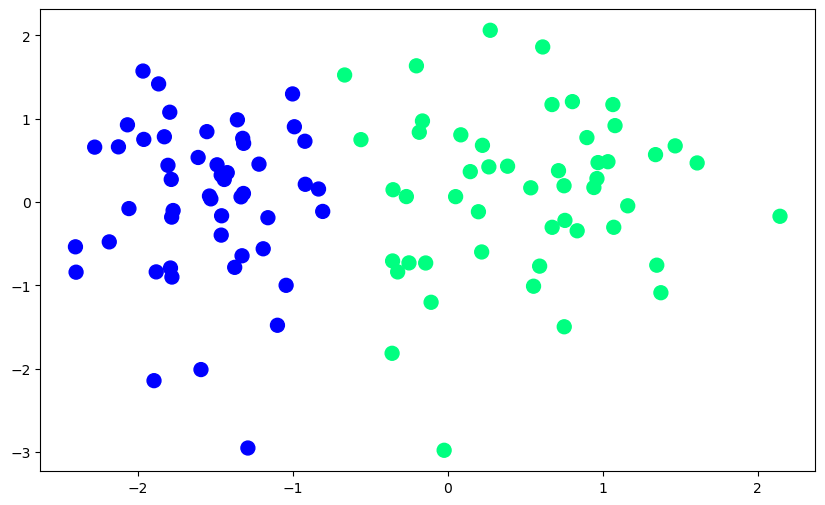

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1], c=y,cmap='winter',s=100)

In [4]:
X = np.insert(X, 0, 1, axis=1)
X

array([[ 1.        ,  0.19924745, -0.11697552],
       [ 1.        , -0.24882029, -0.73115232],
       [ 1.        , -0.3544904 , -0.7081059 ],
       [ 1.        , -1.59086506, -2.01199214],
       [ 1.        , -0.20083951,  1.63493163],
       [ 1.        , -0.83241122,  0.15599044],
       [ 1.        , -1.79207014,  1.07782053],
       [ 1.        ,  0.0856607 ,  0.80626713],
       [ 1.        , -0.55865299,  0.74859527],
       [ 1.        , -1.95974262,  0.75152794],
       [ 1.        , -1.77828947, -0.90114581],
       [ 1.        , -1.77985853, -0.1815243 ],
       [ 1.        , -0.02194151, -2.98092432],
       [ 1.        ,  0.80563431,  1.20500136],
       [ 1.        , -1.82701214,  0.78302407],
       [ 1.        ,  0.38730728,  0.42968688],
       [ 1.        , -0.14108668, -0.73229726],
       [ 1.        , -1.87955941, -0.83930476],
       [ 1.        , -0.18232911,  0.83727062],
       [ 1.        , -1.77059533, -0.10255323],
       [ 1.        , -2.27658028,  0.658

In [5]:
X.shape

(100, 3)

In [ ]:
class PerceptronModel:
    def __init__(self, learning_rate=0.1, epochs=10000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
    
    def fit(self, X, y):
        samples, features = X.shape
        self.weights = np.zeros(features)

        for i in range(self.epochs):
            random=np.random.randint(0, samples)
            X_random = X[random]
            y_actual = y[random]

            y_predict = np.dot(X_random, self.weights)

            if y_predict >=0:
                y_predict = 1
            else:
                y_predict = 0

            self.weights = self.weights + self.learning_rate * (y_actual - y_predict) * X_random

        print("Weights after training:", self.weights)

In [7]:
model = PerceptronModel()
model.fit(X, y)

Weights after training: [0.3        0.49157767 0.05295522]


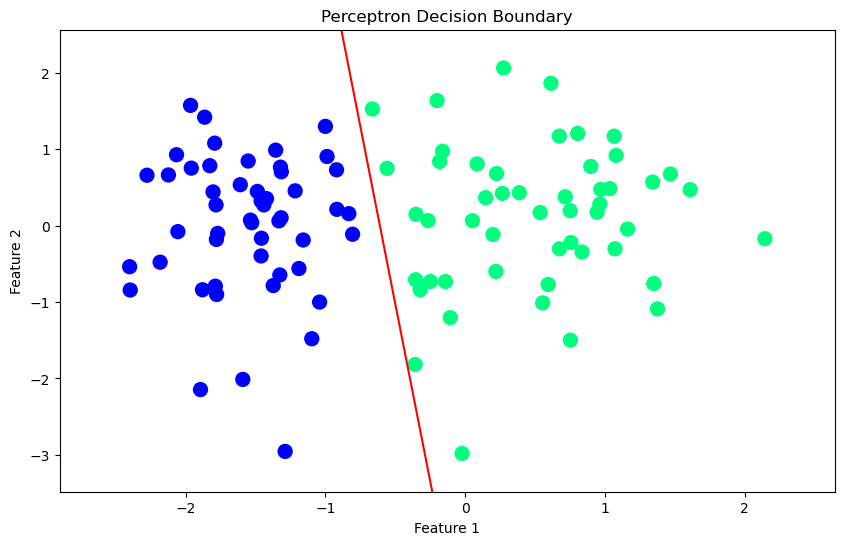

In [8]:
x1 = X[:, 1]
x2 = X[:, 2]

plt.figure(figsize=(10,6))
plt.scatter(x1, x2, c=y, cmap='winter', s=100)

if abs(model.weights[2]) < 1e-8:
    # nearly vertical boundary: w0 + w1*x1 = 0
    x_vertical = -model.weights[0] / model.weights[1]
    plt.axvline(x=x_vertical, color='red')
else:
    x_values = np.array([x1.min(), x1.max()])
    y_values = -(model.weights[0] + model.weights[1] * x_values) / model.weights[2]
    plt.plot(x_values, y_values, color='red')

# keep axes focused on data range
plt.xlim(x1.min()-0.5, x1.max()+0.5)
plt.ylim(x2.min()-0.5, x2.max()+0.5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary')
plt.show()